# Comandos para realização do trabalho da matéria de NLP com uso da biblioteca SKlearn e NLTK.

## <font color=red>Observação importante:</font>

<font color=yellow>Trabalho realizado com uso de corpus diferente do Fake.br não será aceito!</font>

## Carregando arquivos `pre-processed.csv`, de imagem e de funções auxiliares para dentro do Google Colab

In [35]:
!wget https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv -O pre-processed.csv
!git clone https://github.com/N-CPUninter/NLP.git
!rm ./NLP/*.ipynb
!mv ./NLP/* .
!rm -r NLP

--2025-08-24 20:05:41--  https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20434897 (19M) [text/plain]
Saving to: ‘pre-processed.csv’

pre-processed.csv   100%[===================>]  19.49M  35.0MB/s    in 0.6s    

2025-08-24 20:05:42 (35.0 MB/s) - ‘pre-processed.csv’ saved [20434897/20434897]

Cloning into 'NLP'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 34 (delta 9), reused 25 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 1.27 MiB | 4.96 MiB/s, done.
Resolving deltas: 100% (9/9), done.
mv: cannot move './NLP/data' to './data': Directory

## Instalação manual das dependências para uso do SKlearn e do NLTK no Google Colab

In [36]:
import pandas as pd
import nltk
from nltk import ngrams
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from funcoes_auxiliares import gerar_nuvem_palavras

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

## Criar dataframe do CSV utilizando o método read_csv do pandas

In [37]:
df = pd.read_csv('pre-processed.csv')

# PRÁTICA 1 - CRIAÇÃO DE MODELO DE CLASSIFICAÇÃO SUPERVISIONADO PARA ANÁLISE DE FAKE NEWS.

1. Realize os seguintes procedimentos de limpeza dos textos do dataframe criado:

  1.1. Tokenizar

  1.2. Retirar os acentos e números

  1.3. Deixar tudo em minúsculas

  1.4. Retirar as stopwords e pontuações

  1.5. Deixar palavras apenas com radical (STEM)

  1.6. Realizar truncamento dos pares de notícias verdadeiras com falsas para normalizar quantidade de palavras

  1.7. Remontar as notícias em string e criar coluna no dataframe para o resultado deste pré-processamento.

2. Criar matriz de frequências TF-IDF com ngramas de 1 a 3 palavras.

3. Usar a função train_test_split do Scikit Learn para dividir o corpus pré-tratado em 75% dos textos para treinamento e 25% para testes de precisão (usar random_state = 42 ou outro número de sua escolha).

4. Fazer regressão logística com solver = 'lbfgs'.

5. Realizar predição dos textos de teste com o método predict_proba, que retornará a porcentagem predita para fake e para real em um array.

6. Por fim, com as porcentagens calculadas para cada texto de teste, usar a função accuracy_score da biblioteca Scikit Learn para calcular a acurácia geral do algoritmo.

In [43]:
import pandas as pd
import nltk
import re
import unicodedata
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string


nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

def limpar_texto(texto):
    texto = str(texto).lower()  # minusculas
    # remover acentos
    texto = ''.join(c for c in unicodedata.normalize('NFD', texto)
                    if unicodedata.category(c) != 'Mn')
    # remover números
    texto = re.sub(r'\d+', '', texto)
    # tokenizar
    tokens = word_tokenize(texto)
    # remover pontuação e stopwords
    tokens = [t for t in tokens if t not in stop_words and t not in string.punctuation]
    return tokens

# Aplicar na coluna correta
df['tokens'] = df['preprocessed_news'].apply(limpar_texto)

# Mostrar resultado
print(df[['preprocessed_news', 'tokens']].head())

#Stemming, que é o processo de reduzir palavras à sua raiz ou radical,
# para que palavras diferentes com o mesmo significado base sejam tratadas como iguais.
from nltk.stem import PorterStemmer
nltk.download('rslp')
stemmer = PorterStemmer()
def stem_processo(texto):
  tokens_stem = [stemmer.stem(t) for t in texto]
  return tokens_stem

# Aplicar na coluna correta
df['tokens_stem'] = df['tokens'].apply(stem_processo)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                   preprocessed_news  \
0  katia abreu diz vai colocar expulsao moldura n...   
1  ray peita bolsonaro conservador fake entrevist...   
2  reinaldo azevedo desmascarado policia federal ...   
3  relatorio assustador bndes mostra dinheiro pub...   
4  radialista americano fala sobre pt vendem ilus...   

                                              tokens  
0  [katia, abreu, diz, vai, colocar, expulsao, mo...  
1  [ray, peita, bolsonaro, conservador, fake, ent...  
2  [reinaldo, azevedo, desmascarado, policia, fed...  
3  [relatorio, assustador, bndes, mostra, dinheir...  
4  [radialista, americano, fala, sobre, pt, vende...  


[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [49]:
# Realizar truncamento dos pares de notícias verdadeiras com falsas para normalizar quantidade de palavras
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['tokens_stem'])
sequences = tokenizer.texts_to_sequences(df['tokens_stem'])

#  tamanho máximo
max_len = 150

# Truncamento
X = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

print(X.shape)
df['news_processed'] = df['tokens_stem'].apply(lambda tokens: ' '.join(tokens))
print(df[['preprocessed_news', 'news_processed']].head())



(7200, 150)
                                   preprocessed_news  \
0  katia abreu diz vai colocar expulsao moldura n...   
1  ray peita bolsonaro conservador fake entrevist...   
2  reinaldo azevedo desmascarado policia federal ...   
3  relatorio assustador bndes mostra dinheiro pub...   
4  radialista americano fala sobre pt vendem ilus...   

                                      news_processed  
0  katia abreu diz vai colocar expulsao moldura n...  
1  ray peita bolsonaro conservador fake entrevist...  
2  reinaldo azevedo desmascarado policia feder fe...  
3  relatorio assustador bnde mostra dinheiro publ...  
4  radialista americano fala sobr pt vendem ilusa...  


In [54]:
# matriz TF-IDF usando n-gramas de 1 a 3 palavras. Isso é útil para capturar não só palavras isoladas (unigramas), mas também combinações de palavras (bigramas e trigramas), que podem conter mais contexto semântico.
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['news_processed'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())




In [62]:
#epois de gerar a matriz TF-IDF e ter o rótulo das notícias (label),
#  dividir os dados em treinamento e teste usando a função train_test_split do Scikit-Learn.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = tfidf_matrix
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix,
    df['label'],
    test_size=0.25,
    random_state=42  )


# Criar o modelo de regressão logística
model = LogisticRegression(solver='lbfgs', max_iter=1000)  # max_iter aumentado para garantir convergência

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
acc = accuracy_score(y_test, y_pred)
print("Acurácia:", acc)
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusão:\n", confusion_matrix(y_test, y_pred))


Acurácia: 0.9533333333333334

Relatório de classificação:
               precision    recall  f1-score   support

        fake       0.95      0.96      0.95       915
        true       0.96      0.94      0.95       885

    accuracy                           0.95      1800
   macro avg       0.95      0.95      0.95      1800
weighted avg       0.95      0.95      0.95      1800


Matriz de confusão:
 [[882  33]
 [ 51 834]]


In [63]:
#Depois de treinar o modelo de Regressão Logística, usando o método predict_proba
y_proba = model.predict_proba(X_test)
for i in range(5):
    print(f"Notícia {i+1}: Prob Fake = {y_proba[i][0]:.4f}, Prob Real = {y_proba[i][1]:.4f}")

Notícia 1: Prob Fake = 0.9020, Prob Real = 0.0980
Notícia 2: Prob Fake = 0.8645, Prob Real = 0.1355
Notícia 3: Prob Fake = 0.0248, Prob Real = 0.9752
Notícia 4: Prob Fake = 0.7298, Prob Real = 0.2702
Notícia 5: Prob Fake = 0.8191, Prob Real = 0.1809


In [65]:
# obter as probabilidades com predict_proba

label_map = {'fake': 0, 'true': 1}
y_test_mapped = y_test.map(label_map)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_mapped, y_pred_final)
print("Acurácia geral do modelo:", accuracy)


Acurácia geral do modelo: 0.9533333333333334


## QUESTÃO 01: Apresente aqui o código referente ao modelo gerado e a nuvem de palavras que foram usadas para identificar textos VERDADEIROS.

1. Formate seus dados usados para o treinamento do seu modelo em um dicionário de tokens e suas frequências.
2. Separe os dados em um grupo com textos marcados como verdadeiros e outro com os falsos.
3. Use a função gerar_nuvem_palavras(dic_de_frequências_textos_verdadeiras, imagem de sua escolha) para gerar a nuvem de palavras


In [39]:
# Coloque seu código aqui


## QUESTÃO 02: Apresente aqui o código referente ao modelo gerado e a nuvem de palavras que foram usadas para identificar textos FALSOS.

1. Use a função gerar_nuvem_palavras(dic_de_frequências_textos_verdadeiras, imagem de sua escolha) para gerar a nuvem de palavras

In [40]:
# Coloque seu código aqui


---

# Material Complementar

## Alguns exemplos de uso da função auxiliar
`gerar_nuvem_palavras(dicionario_tokens_e_frequencia, arquivo_mascara)`

Gera uma nuvem de palavras com base em seu dicionário de palavras ou ngramas
    como a chave e a frequência de aparição do token como valor (inteiro).

    Parâmetros:
        dicionario_tokens_e_frequencia (dict): O dicionário de tokens e suas
                                               respectivas frequências de
                                               aparição nos textos.
        arquivo_mascara (str): O nome do arquivo da imagem de máscara. Pde ser:
                                            cloud_mask.png
                                            mapa_brasil_mask.png
                                            thumbs_up_mask.png        
                                            thumbs_down_mask.png
                                            <Outro arquivo de sua escolha>

    Exemplos de Uso:
        1. Para gerar uma nuvem de palavras na máscara mapa do brasil:
            gerar_nuvem_palavras(dicionario_tokens_e_frequencia=word_dict,
                                 arquivo_mascara='mapa_brasil_mask.png')

   * Um total de 7 tokens foram computadas a partir do conjunto de dados.



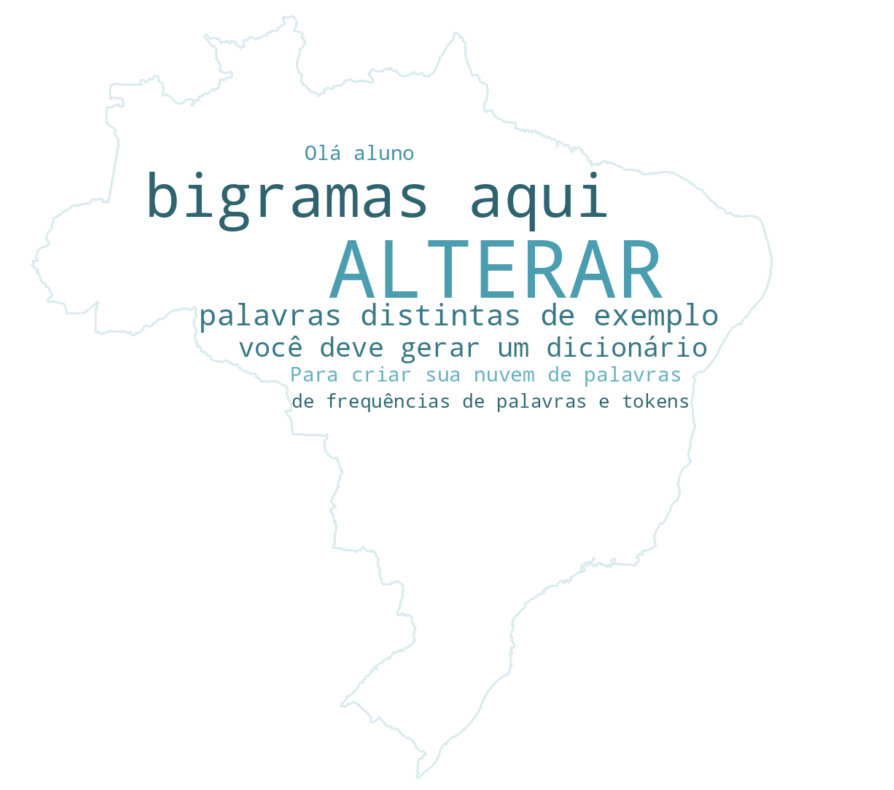

(<wordcloud.wordcloud.WordCloud at 0x78ff6d69a0f0>, 7)

In [41]:
# Exemplo com dicionário de tokens unigramas e multigramas com frequências
words_dict = {'Olá aluno':1,
              'ALTERAR':4,
              'bigramas aqui':2,
              'palavras distintas de exemplo':2,
              'Para criar sua nuvem de palavras':1,
              'você deve gerar um dicionário':2,
              'de frequências de palavras e tokens':1}
gerar_nuvem_palavras(dicionario_tokens_e_frequencia=words_dict,
                     arquivo_mascara="mapa_brasil_mask.png")

{'de palavras': np.int64(2), 'exemplo gerar': np.int64(1), 'gerar uma': np.int64(1), 'uma nuvem': np.int64(1), 'nuvem de': np.int64(1), 'palavras usando': np.int64(1), 'usando texto': np.int64(1), 'texto completo': np.int64(1), 'completo você': np.int64(1), 'você deve': np.int64(1), 'deve primeiro': np.int64(1), 'primeiro separar': np.int64(1), 'separar ele': np.int64(1), 'ele um': np.int64(1), 'um um': np.int64(1), 'um ou': np.int64(1), 'ou mais': np.int64(1), 'mais tokens': np.int64(1), 'tokens para': np.int64(1), 'para só': np.int64(1), 'só depois': np.int64(1), 'depois vetorizar': np.int64(1), 'vetorizar ao': np.int64(1), 'ao vetorizar': np.int64(1), 'vetorizar você': np.int64(1), 'você terá': np.int64(1), 'bag of': np.int64(1), 'of words': np.int64(1), 'words que': np.int64(1), 'que te': np.int64(1), 'te permitirá': np.int64(1), 'permitirá contar': np.int64(1), 'contar quantas': np.int64(1), 'quantas vezes': np.int64(1), 'vezes cada': np.int64(1), 'cada palavra': np.int64(1), 'pal

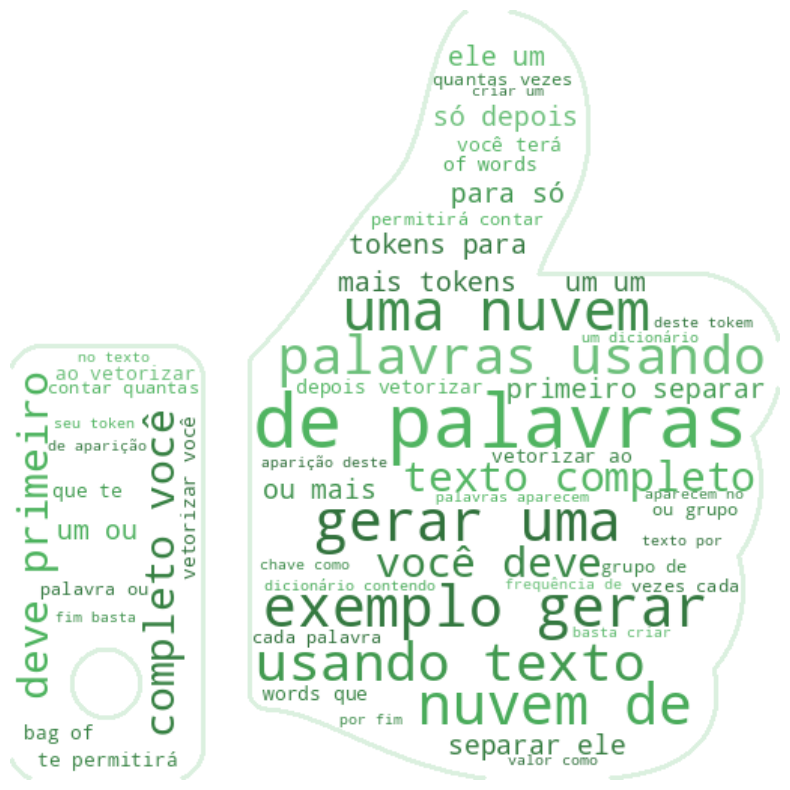

(<wordcloud.wordcloud.WordCloud at 0x78ff5b8919d0>, 56)

In [42]:
# Exemplo com uma frase completa
texto = """Exemplo: Gerar uma nuvem de palavras usando texto completo você deve
           primeiro separar ele um um ou mais tokens, para só depois vetorizar.
           Ao vetorizar você terá a bag of words, que te permitirá contar
           quantas vezes cada palavra ou grupo de palavras aparecem no texto.
           Por fim, basta criar um dicionário contendo a chave como o seu token
           e o valor como a frequência de aparição deste tokem."""
# Vetorização e contagem de frequência simples de bigramas:
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform([a+' '+b for a,b in (ngrams(texto.split(),2))])
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_dict = dict(words_freq)
print(words_dict)

gerar_nuvem_palavras(dicionario_tokens_e_frequencia=words_dict,
                      arquivo_mascara='thumbs_up_mask.png')